In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("dataset_diabetes_diabetic_data.csv")
df.head(10)

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,No,No
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,Ch,Yes
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,Yes
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,Ch,Yes
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,Ch,Yes
5,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,414,411,250,9,No,Yes
6,84259809,Caucasian,Male,[60-70),3,1,2,4,70,1,21,0,0,0,414,411,V45,7,Ch,Yes
7,114882984,Caucasian,Male,[70-80),1,1,7,5,73,0,12,0,0,0,428,492,250,8,No,Yes
8,48330783,Caucasian,Female,[80-90),2,1,4,13,68,2,28,0,0,0,398,427,38,8,Ch,Yes
9,63555939,Caucasian,Female,[90-100),3,3,4,12,33,3,18,0,0,0,434,198,486,8,Ch,Yes


In [3]:
df.drop("patient_nbr",axis = 1, inplace = True)

In [4]:
for col in df.columns:
    print(col,":",df[col].nunique())

race : 6
gender : 3
age : 10
admission_type_id : 8
discharge_disposition_id : 26
admission_source_id : 13
time_in_hospital : 14
num_lab_procedures : 116
num_procedures : 7
num_medications : 74
number_outpatient : 29
number_emergency : 19
number_inpatient : 21
diag_1 : 685
diag_2 : 702
diag_3 : 727
number_diagnoses : 16
change : 2
diabatic : 2


### Dealing with Missing Values

In [5]:
df[df["diag_1"] == '?']["diag_1"].count()

19

In [6]:
df[df["diag_2"] == '?']["diag_2"].count()

304

In [7]:
df[df["diag_3"] == '?']["diag_3"].count()

1237

In [8]:
count = 0
for col in df.columns:
    if (df[df[col] == '?'][col].count()) > 0:
        print(col,":",df[df[col] == '?'][col].count())
        count+=1
print(count)
    

race : 1461
diag_1 : 19
diag_2 : 304
diag_3 : 1237
4


In [9]:
count = 0
for index, row in df.iterrows():
#     print(index,row)
    if (row["race"] == '?')&(row["diag_1"] == '?')&(row["diag_2"] == '?')&(row["diag_3"] == '?'):
        count+=1
print(count)

0


In [10]:
df.shape[0]

70180

In [11]:
df.drop(["diag_1","diag_2","diag_3"],axis = 1, inplace= True)

In [12]:
df.drop_duplicates(keep='first',inplace=True)

In [13]:
df.shape[0]

70158

### Correlation

<AxesSubplot:>

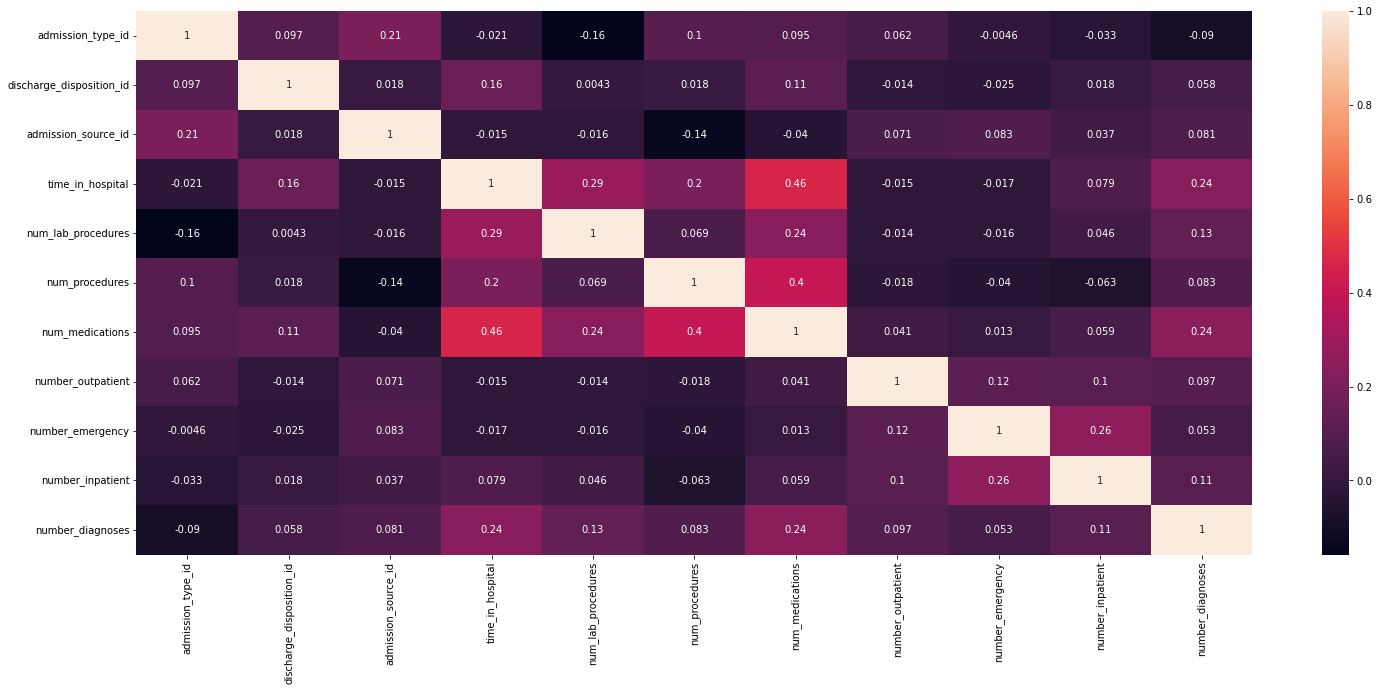

In [14]:
plt.figure(figsize = (25,10))
sns.heatmap(df.corr(),annot = True)

In [15]:
df["race"].replace("?",np.nan,inplace = True)
df.dropna(subset = ["race"],inplace = True)

# Model Development

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,auc

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
df.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabatic
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,No,No
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,Ch,Yes
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,No,Yes
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,Ch,Yes
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,Ch,Yes
5,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,9,No,Yes
6,Caucasian,Male,[60-70),3,1,2,4,70,1,21,0,0,0,7,Ch,Yes
7,Caucasian,Male,[70-80),1,1,7,5,73,0,12,0,0,0,8,No,Yes
8,Caucasian,Female,[80-90),2,1,4,13,68,2,28,0,0,0,8,Ch,Yes
9,Caucasian,Female,[90-100),3,3,4,12,33,3,18,0,0,0,8,Ch,Yes


### Turning categorical variables into quantitative variables 

In [19]:
df["race"] = le.fit_transform(df["race"])
df["age"] = le.fit_transform(df["age"])
df["gender"] = le.fit_transform(df["gender"])
df["change"] = le.fit_transform(df["change"])
df["diabatic"] = le.fit_transform(df["diabatic"])

In [20]:
X = df.drop("diabatic", axis = 1)
y = df.diabatic

### Feature importance from Extra tree classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [42]:
et = ExtraTreesClassifier()
et.fit(X,y)

ExtraTreesClassifier()

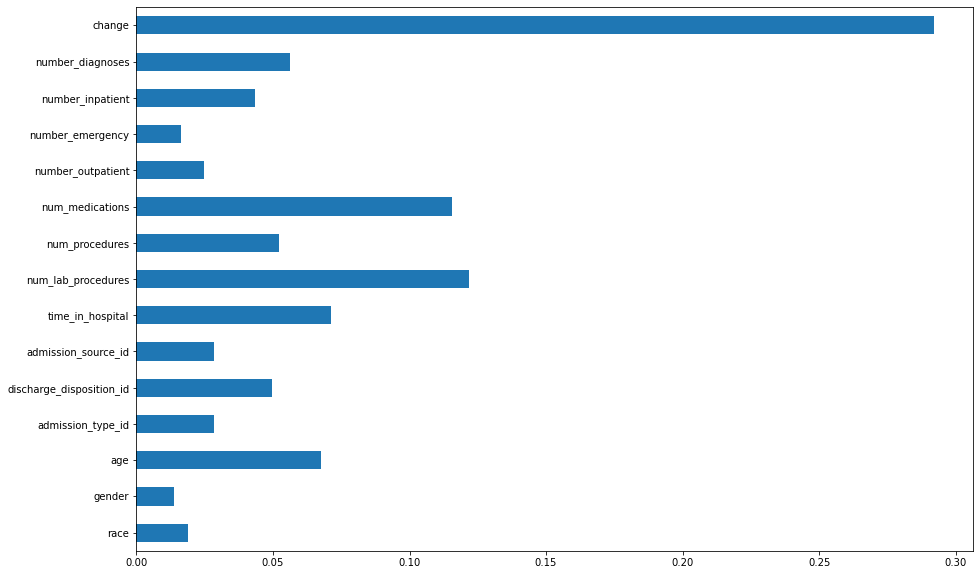

In [46]:
plt.figure(figsize = (15,10))
dd = pd.Series(et.feature_importances_,index=X.columns)
dd.plot(kind = "barh")
plt.show()

### DecisionTree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=10)

In [24]:
model = DecisionTreeClassifier()

In [25]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
y_pred = model.predict(X_test)

In [38]:
accuracy_score(y_pred,y_test)

0.7116933527413877

### Grid Search

In [28]:
from sklearn.model_selection import GridSearchCV


In [47]:
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
# decision tree model
dtree_model=DecisionTreeClassifier()
#use gridsearch to test all values
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=5)
#fit model to data
dtree_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [48]:
dtree_gscv.best_estimator_

DecisionTreeClassifier(max_depth=6)

In [49]:
scores = dtree_gscv.cv_results_
scores["mean_test_score"]

array([0.70393293, 0.70182236, 0.70319069, 0.71166288, 0.70492304,
       0.7018658 , 0.70218619, 0.69969701, 0.70129822, 0.69663991,
       0.69781899, 0.69917279, 0.70372915, 0.70177869, 0.70094906,
       0.70879534, 0.7032782 , 0.69664018, 0.70272478, 0.69905651,
       0.7014584 , 0.69661092, 0.69738245, 0.69816839])

In [50]:
dtree_gscv.score(X_test,y_test)

0.7420669577874818

In [51]:
# AUC-ROC Curve 
prob_dtree_grid = dtree_gscv.predict_proba(X_test)

In [52]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, prob_dtree_grid[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, prob_dtree_grid[:,1])

print(auc_score1)

0.8343552676545275
